### Imports

In [1]:
# Data Analysis, Data Manipulation, Math, and Statistics
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

# Output for multiple cell - Enable
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning 

##### No Missing or Corrupt Values
This data represents a year's worth of songs being seleccted in units of 100. 52 weeks x 100 songs = 5,200 songs a year.

In [2]:
#BILLBOARD DATA
df1 = pd.read_csv("billboard_top_100.csv", parse_dates=[8])
df1

,Unnamed: 0,id,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart,date
0,0,1,1,Mariah Carey,All I Want For Christmas Is You,1,1,37,2020-01-04
1,1,2,2,Brenda Lee,Rockin' Around The Christmas Tree,2,2,32,2020-01-04
2,2,3,3,Bobby Helms,Jingle Bell Rock,9,3,30,2020-01-04
3,3,4,4,Burl Ives,A Holly Jolly Christmas,6,4,15,2020-01-04
4,4,5,5,Post Malone,Circles,3,1,17,2020-01-04
...,...,...,...,...,...,...,...,...,...
5195,5195,5196,96,Carrie Underwood & John Legend,Hallelujah,0,96,1,2020-12-26
5196,5196,5197,97,DaBaby,Practice,0,86,5,2020-12-26
5197,5197,5198,98,Ritt Momney,Put Your Records On,0,79,9,2020-12-26
5198,5198,5199,99,Bad Bunny,Te Mudaste,60,60,2,2020-12-26


In [3]:
df1.dtypes

Unnamed: 0                 int64
id                         int64
rank                       int64
artist                    object
song                      object
rank_last_week             int64
peak_rank                  int64
weeks_on_chart             int64
date              datetime64[ns]
dtype: object

In [4]:
df1.isna().sum()

Unnamed: 0        0
id                0
rank              0
artist            0
song              0
rank_last_week    0
peak_rank         0
weeks_on_chart    0
date              0
dtype: int64

Ranking columns must harbor categorical values.

In [5]:
df1.head()

,Unnamed: 0,id,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart,date
0,0,1,1,Mariah Carey,All I Want For Christmas Is You,1,1,37,2020-01-04
1,1,2,2,Brenda Lee,Rockin' Around The Christmas Tree,2,2,32,2020-01-04
2,2,3,3,Bobby Helms,Jingle Bell Rock,9,3,30,2020-01-04
3,3,4,4,Burl Ives,A Holly Jolly Christmas,6,4,15,2020-01-04
4,4,5,5,Post Malone,Circles,3,1,17,2020-01-04


In [6]:
df_weeks_total = df1.sort_values(by='weeks_on_chart', ascending=False)
df_weeks_total

,Unnamed: 0,id,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart,date
4517,4517,4518,18,Post Malone,Circles,19,1,61,2020-11-14
4418,4418,4419,19,Post Malone,Circles,19,1,60,2020-11-07
4318,4318,4319,19,Post Malone,Circles,22,1,59,2020-10-31
4221,4221,4222,22,Post Malone,Circles,17,1,58,2020-10-24
4116,4116,4117,17,Post Malone,Circles,17,1,57,2020-10-17
...,...,...,...,...,...,...,...,...,...
2913,2913,2914,14,Juice WRLD,Titanic,0,14,1,2020-07-25
2915,2915,2916,16,Juice WRLD,Bad Energy,0,16,1,2020-07-25
2921,2921,2922,22,Kid Cudi & Eminem,The Adventures Of Moon Man & Slim Shady,0,22,1,2020-07-25
2933,2933,2934,34,Juice WRLD,Stay High,0,34,1,2020-07-25


In [7]:
df1.rank_last_week = pd.Categorical(df1.rank_last_week)
df1.peak_rank = pd.Categorical(df1.peak_rank)
df1.rank = pd.Categorical(df1.rank)

In [8]:
#In the scope of this project,the first two rows, "unnamed..." and "id", will not be useful.
df1 = df1.drop(columns=["Unnamed: 0", "id", "rank"])


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   artist          5200 non-null   object        
 1   song            5200 non-null   object        
 2   rank_last_week  5200 non-null   category      
 3   peak_rank       5200 non-null   category      
 4   weeks_on_chart  5200 non-null   int64         
 5   date            5200 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(2)
memory usage: 141.7+ KB


In [10]:
df1.head()

,artist,song,rank_last_week,peak_rank,weeks_on_chart,date
0,Mariah Carey,All I Want For Christmas Is You,1,1,37,2020-01-04
1,Brenda Lee,Rockin' Around The Christmas Tree,2,2,32,2020-01-04
2,Bobby Helms,Jingle Bell Rock,9,3,30,2020-01-04
3,Burl Ives,A Holly Jolly Christmas,6,4,15,2020-01-04
4,Post Malone,Circles,3,1,17,2020-01-04


<AxesSubplot:>

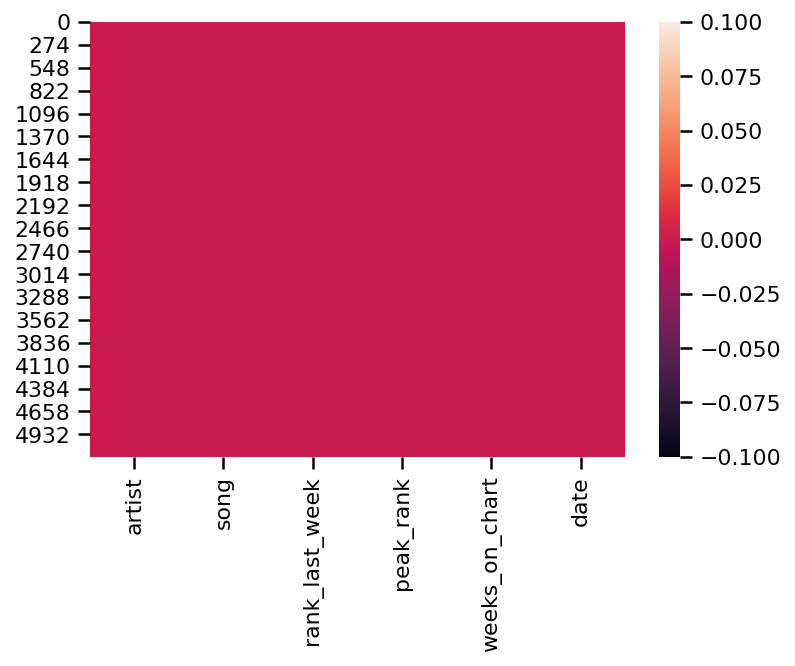

In [11]:
# Our data has no null values. Great!
sns.heatmap(df1.isna())

# EDA

Text(0.5, 0, 'Time on Billboard (in weeks)')

Text(0, 0.5, 'Top Artists')

Text(0.5, 1.0, 'Top 10 Billboard Artists with Most Time on Charts During 2020')

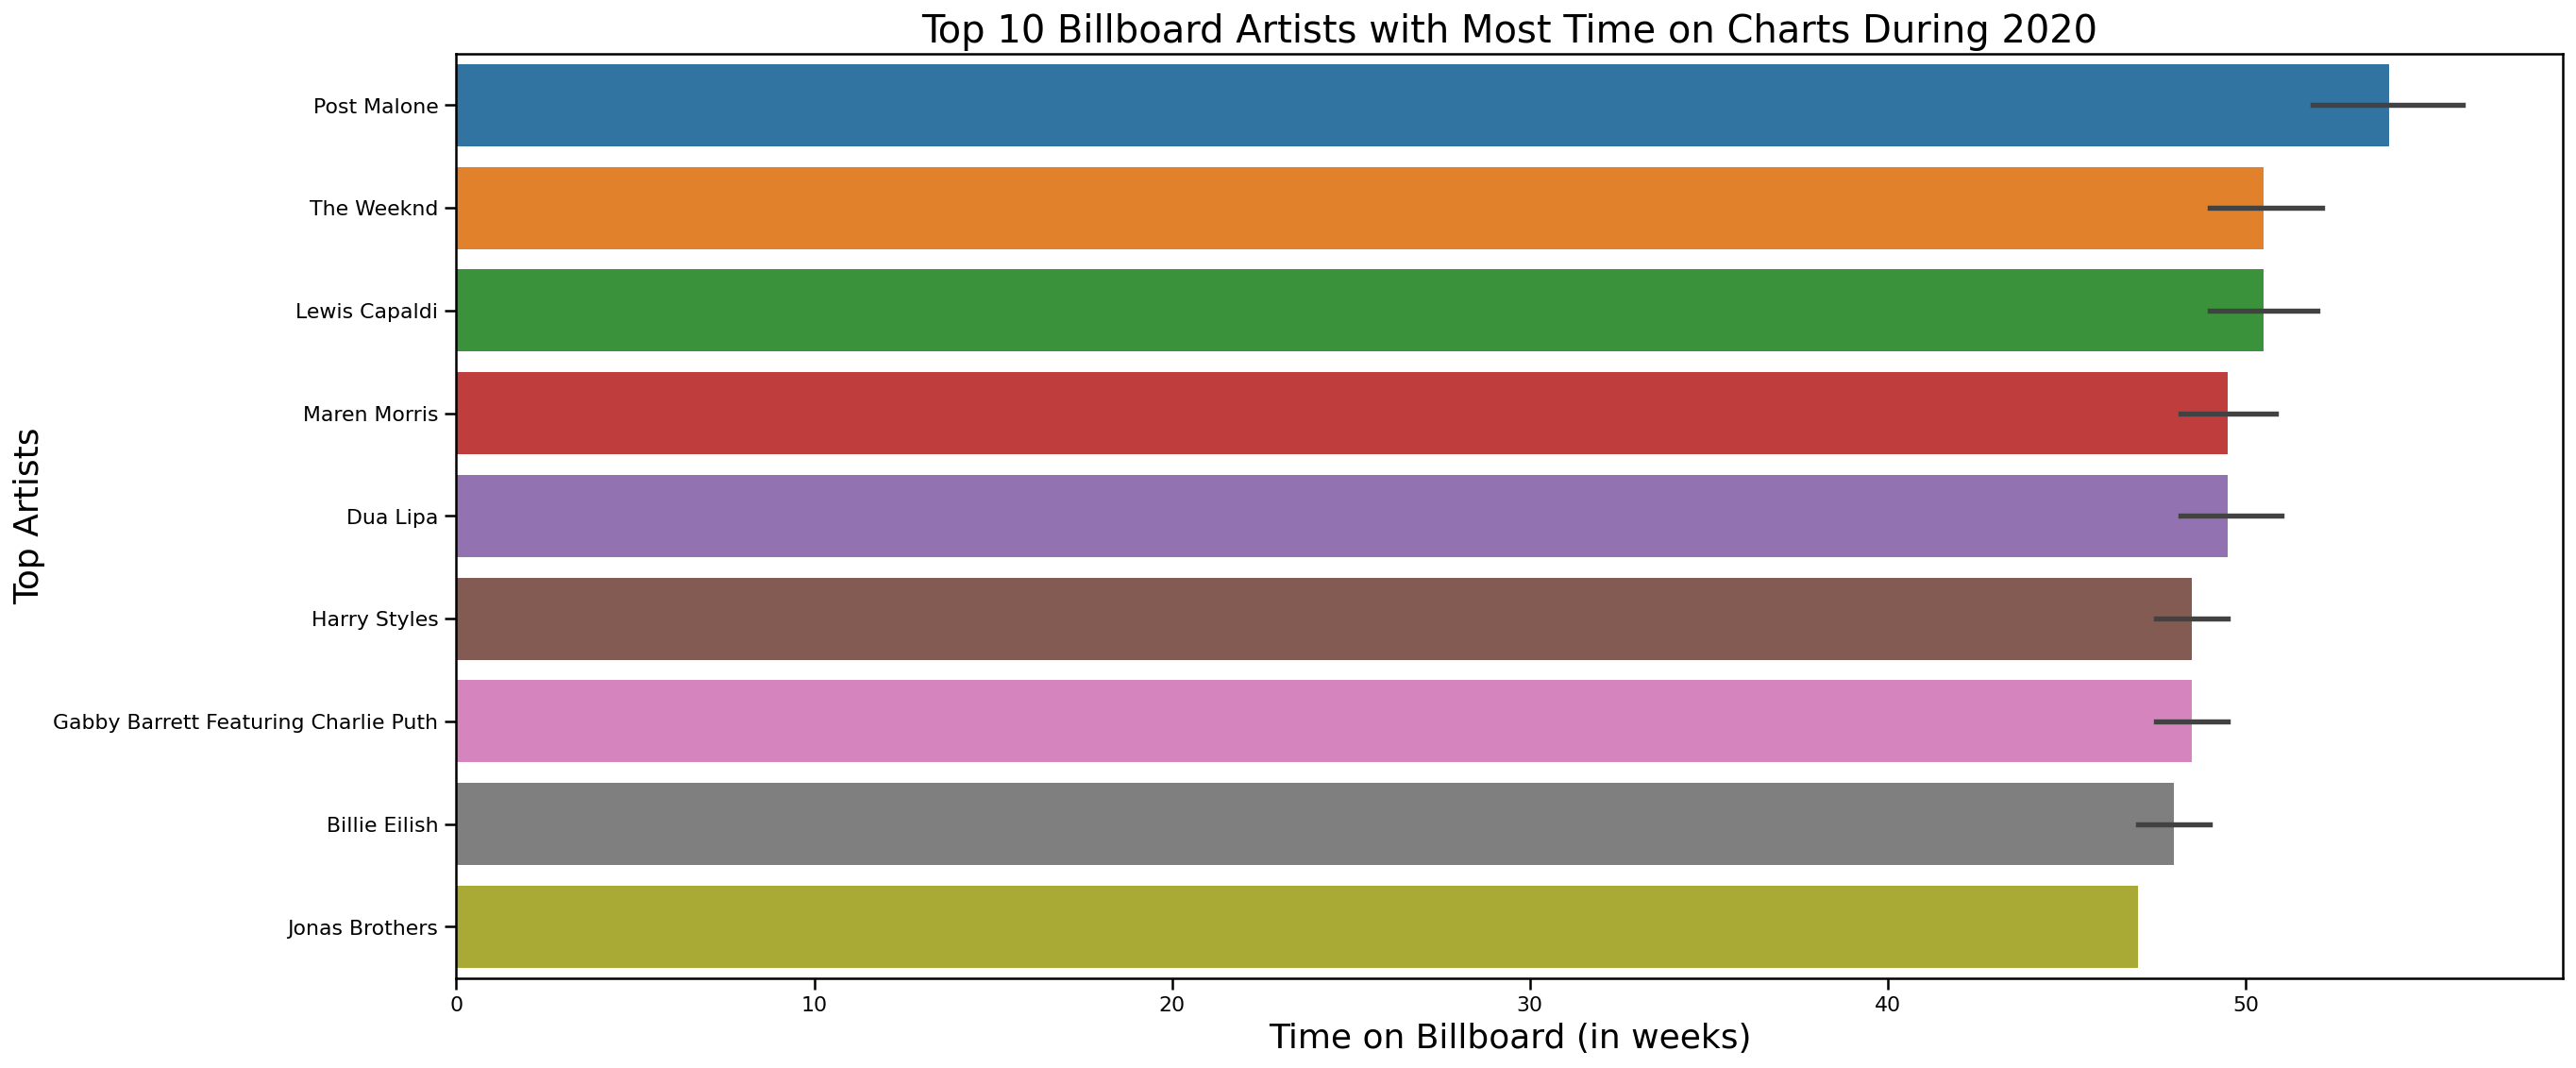

In [21]:
#cols=df1.columns.tolist()
#cols.sort()
#df2=df1[cols][0:10]

df_weeks_total_sample = df_weeks_total[0:55]

fig, ax = plt.subplots(figsize = (20,9))

labels = df_weeks_total.artist[0:11]
chart1 = sns.barplot(x="weeks_on_chart", y="artist", data=df_weeks_total_sample)
ax.set_xlabel('Time on Billboard (in weeks)', fontsize=18)
ax.set_ylabel('Top Artists', fontsize=18)
ax.set_title("Top 10 Billboard Artists with Most Time on Charts During 2020", fontsize=20)

In [14]:
df_weeks_total

,Unnamed: 0,id,rank,artist,song,rank_last_week,peak_rank,weeks_on_chart,date
4517,4517,4518,18,Post Malone,Circles,19,1,61,2020-11-14
4418,4418,4419,19,Post Malone,Circles,19,1,60,2020-11-07
4318,4318,4319,19,Post Malone,Circles,22,1,59,2020-10-31
4221,4221,4222,22,Post Malone,Circles,17,1,58,2020-10-24
4116,4116,4117,17,Post Malone,Circles,17,1,57,2020-10-17
...,...,...,...,...,...,...,...,...,...
2913,2913,2914,14,Juice WRLD,Titanic,0,14,1,2020-07-25
2915,2915,2916,16,Juice WRLD,Bad Energy,0,16,1,2020-07-25
2921,2921,2922,22,Kid Cudi & Eminem,The Adventures Of Moon Man & Slim Shady,0,22,1,2020-07-25
2933,2933,2934,34,Juice WRLD,Stay High,0,34,1,2020-07-25


In [41]:
#most_freq = df_weeks_total['song'].value_counts()
most_freq = pd.DataFrame(data=df_weeks_total, columns=['artist', 'song', 'weeks_on_chart', 'rank_last_week'])
most_freq = most_freq.sort_values(by='weeks_on_chart', ascending=False)
most_freq.head(30)
#if most_freq.weeks_on_chart

,artist,song,weeks_on_chart,rank_last_week
4517,Post Malone,Circles,61,19
4418,Post Malone,Circles,60,19
4318,Post Malone,Circles,59,22
4221,Post Malone,Circles,58,17
4116,Post Malone,Circles,57,17
4016,Post Malone,Circles,56,16
3915,Post Malone,Circles,55,16
3815,Post Malone,Circles,54,15
5106,The Weeknd,Blinding Lights,54,11
2219,Lewis Capaldi,Someone You Loved,54,18


### 2020's top 5 songs, in terms of Billboard placement, are:

'Circles' by Post Malone at 52 weeks, 
'Blinding Lights' by The Weeknd at 50 weeks, 
'I Hope' by Gabby Barrett at 50 weeks, 
'Adore You' by Harry Styles at 49 weeks, 
'Don't Start Now' by Dua Lipa at 46 weeks.

#### 'Circles' by Post Malone made it to the Billboard every week of 2020.

There has been a trend of hip-hop and R&B songs topping the charts of Billboards. 